In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

# FORGE DATASET

X.shape:  (26, 2)


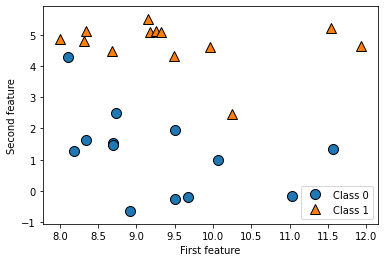

In [8]:
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: ", X.shape)

# WAVE DATASET

Text(0, 0.5, 'Targer')

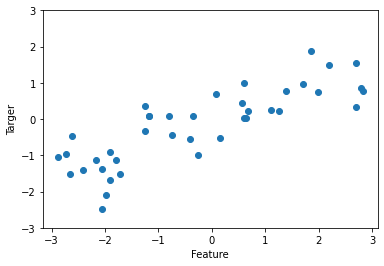

In [9]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Targer")

# CANCER DATASET

In [10]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print('cancer.keys:\n', cancer.keys())

cancer.keys:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [11]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [12]:
print('Shape of cancer data:\n', cancer.data.shape)

Shape of cancer data:
 (569, 30)


In [13]:
print('Samples count per class:\n', 
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

Samples count per class:
 {'malignant': 212, 'benign': 357}


In [14]:
print('Feature names:\n', cancer.feature_names)

Feature names:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


# BOSTON DATA

In [15]:
from sklearn.datasets import load_boston
boston = load_boston()
print('Data shape:\n', boston.data.shape)

Data shape:
 (506, 13)


In [16]:
X, y = mglearn.datasets.load_extended_boston()
print('X.shape: ', X.shape)

X.shape:  (506, 104)


# K-NN CLASSIFICATION

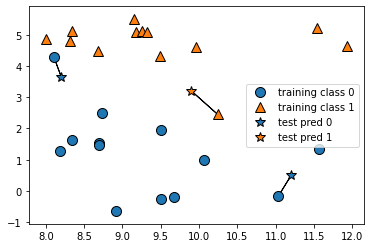

In [17]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

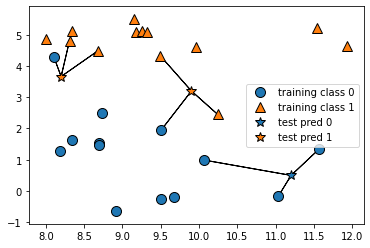

In [18]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

## k-NN explicitly implemented with Scikitlearn

In [19]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [21]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [22]:
print('Test set predictions: ', clf.predict(X_test))

Test set predictions:  [1 0 1 0 1 0 0]


In [23]:
print('Test set accuracy: {:.2f}'.format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


Prediction for all possible test points in the xy-plane: shades regions delimited by a decision boundary

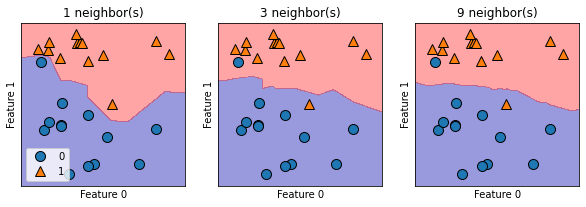

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title('{} neighbor(s)'.format(n_neighbors))
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
    
axes[0].legend(loc=3)

Investigate model complexity vs. generalization using real world data (breast cancer)

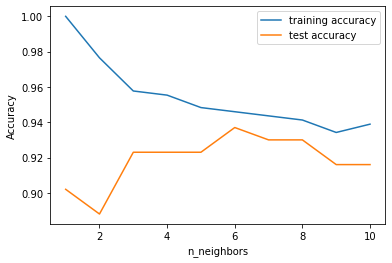

In [25]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66
) 

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # Record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # Record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label='training accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend()

# k-NN Regression variant

Pros: Easy to implement and to understand

Cons: Slow, not able to handle large datasets, particularly underperformant with sparse datasets

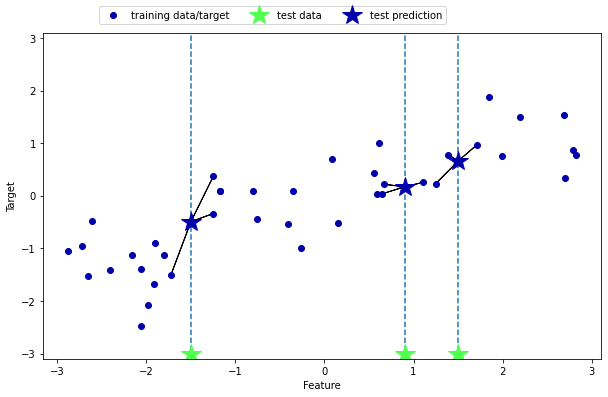

In [26]:
import mglearn
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [27]:
import mglearn.datasets
from sklearn.neighbors import KNeighborsRegressor

X, y =  mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [28]:
print("Test set predictions:\n", reg.predict(X_test))

Test set predictions:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [35]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


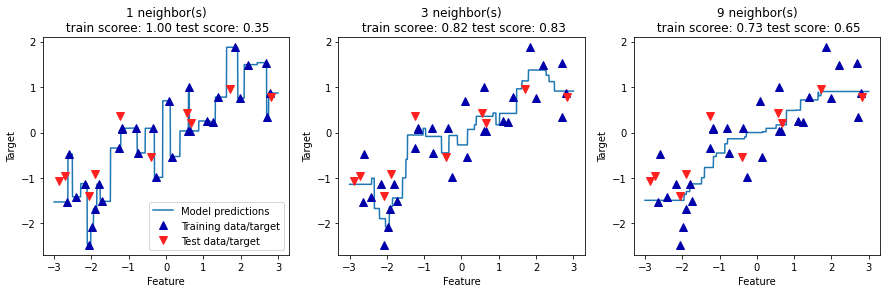

In [37]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
#   Create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    #   Make predictions using 1, 3 and 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title("{} neighbor(s)\n train scoree: {:.2f} test score: {:.2f}".format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")

axes[0].legend(["Model predictions", "Training data/target", "Test data/target"], loc="best")

### Linear Models 

pros: Neither of the two drawbacs of the KNN model from above 

Cons:

Note: Code is continued on the linear_models.ipynb jupyter notebook

w[0]: 0.393906  b: -0.031804


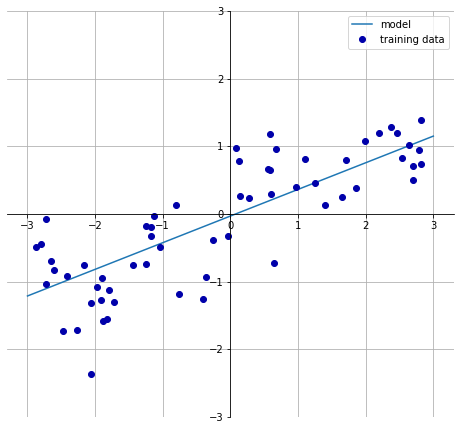

In [38]:
mglearn.plots.plot_linear_regression_wave()